# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas 

In [128]:
import numpy  as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

billboard = pd.read_csv('~/Documents/DSI-BOS-students/pparker-roach/Week 2/project-02/assets/billboard.csv', encoding='iso-8859-1')

pd.set_option('display.max_rows', 500)

#### Start to explore. Save all of your early exploration code here and include in your final submission.
#### I will include my insights from each piece of exploration code above each code line/output

I first just want to explore the column heads to get a sense of what is presented and what questions it might raise to explore
Here's some things/quetions that come to mind...
  * how long does a track spend on the list? - mean?
  * how long does a track take to peak once on the list? - mean?
  * is there a characteristic shape to the weeks on list/placement on list?
  * how does all of the above relate to genre?
  * how does all of the above relate to season of the year?

In [129]:
print(billboard.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week     ...      \
0  Rock    9/23/2000  11/18/2000         78       63.0       49.0     ...       
1  Rock    2/12/2000    4/8/2000         15        8.0        6.0     ...       
2  Rock   10/23/1999   1/29/2000         71       48.0       43.0     ...       
3  Rock    8/12/2000   9/16/2000         41       23.0       18.0     ...       
4  Rock     8/5/2000  10/14/2000         57       47.0       45.0     ...       

   x67th.week  x68th.week  x69th.week  x70th.week 

#### Is there sufficient data to support computing mean track time on list?
  * I already have calculated the mean time on list in a previous exercise, so I will include that code here. Some data cleaning has aleady been done for this
  * the list of weeks on the list may be useful in in plotting placement on list/ seasonal placement / ????
  
  df1.loc[:,'f'] = p.Series(np.random.randn(sLength), index=df1.index)

The average number of weeks a track spent on the Billboard list is  16.741324921135647
The median number of weeks is  18.0
The mode is  0    20
dtype: int64
The standard deviation is  9.083785220668274
The range is the high -57- minus the low -1 = 62.0

The average high point a track achieved on the Billboard list is  89.72239747634069
The median high point is  94.0
The mode is  0    100.0
dtype: float64
The standard deviation is  11.927466835837086
The range is the high -100.0- minus the low -38.0 = 56


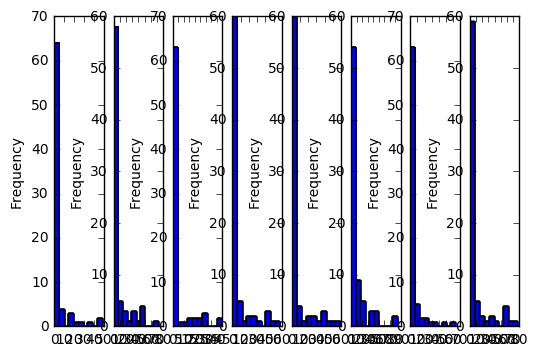

In [174]:
# for each row (artist/track combo) count the number of weeks it was on the chart,
# place it in a list and then find the mean of that list

billboard_index = billboard.index.values.tolist()
billboard_columns = billboard.columns

#the number of weeks a track stayed on the list
weeks_on_list = []
#a list of the week on the list containing thier rating for each week
weeks_list = []
#the highest point on the list that a title reached during its tenure on the list
high_point_list = []

#the following adds a new column onto billboard called "Weeks List" that contains all of the weeks on billboard
#preserving the ranking, but replacing nan's with 0's
for index, row in billboard.iterrows():
    count = 0
    weeks_on_list.append(row['x1st.week':'x76th.week'].notnull().sum()) 
    notnull = row['x1st.week':'x76th.week'].notnull()
    weeks_list.append(row['x1st.week':'x76th.week'].fillna(0))
    high_point_list.append(row['x1st.week':'x76th.week'].max())
    
    
billboard["Weeks List"] = weeks_list
billboard['Total Weeks'] = weeks_on_list
billboard['High Point'] = high_point_list

weeks_on_list = pd.Series(weeks_on_list)
high_point_list = pd.Series(high_point_list)

weeks_on_list_mean = weeks_on_list.mean()
weeks_on_list_median = weeks_on_list.median()
weeks_on_list_mode = weeks_on_list.mode()
weeks_on_list_std = weeks_on_list.std()
weeks_on_list_min = weeks_on_list.min()
weeks_on_list_max = weeks_on_list.max()

high_point_list_mean = high_point_list.mean()
high_point_list_median = high_point_list.median()
high_point_list_mode = high_point_list.mode()
high_point_list_std = high_point_list.std()
high_point_list_min = high_point_list.min()
high_point_list_max = high_point_list.max()

print("The average number of weeks a track spent on the Billboard list is ", weeks_on_list_mean)
print("The median number of weeks is ", weeks_on_list_median)
print("The mode is ", weeks_on_list_mode )
print("The standard deviation is ", weeks_on_list_std)
print("The range is the high -{}- minus the low -{} = {}".format(weeks_on_list_max, weeks_on_list_min, high_point_list_max - high_point_list_min))
print()
print("The average high point a track achieved on the Billboard list is ", high_point_list_mean)
print("The median high point is ", high_point_list_median)
print("The mode is ", high_point_list_mode )
print("The standard deviation is ", high_point_list_std)
print("The range is the high -{}- minus the low -{} = {}".format(high_point_list_max,high_point_list_min, weeks_on_list_max - weeks_on_list_min))


fig = plt.figure()
for i in range(8):
    i = i+1
    ax1 = fig.add_subplot(1,8,i)
    ax1 = billboard.ix[i]["Weeks List"].plot.hist()
    ax2 = fig.add_subplot(1,8,i)
    ax2 = billboard.ix[i]["Weeks List"].plot.hist()
    ax3 = fig.add_subplot(1,8,i)
    ax3 = billboard.ix[i]["Weeks List"].plot.hist()
    ax4 = fig.add_subplot(1,8,i)
    ax4 = billboard.ix[i]["Weeks List"].plot.hist()
    ax5 = fig.add_subplot(1,8,i)
    ax5 = billboard.ix[i]["Weeks List"].plot.hist()
    ax6 = fig.add_subplot(1,8,i)
    ax6 = billboard.ix[i]["Weeks List"].plot.hist()
    ax7 = fig.add_subplot(1,8,i)
    ax7 = billboard.ix[i]["Weeks List"].plot.hist()
    ax8 = fig.add_subplot(1,8,i)
    ax8 = billboard.ix[i]["Weeks List"].plot.hist()
    


##### Write a brief description of your data, and any interesting observations you've made thus far. 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 